In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings("ignore")

In [136]:
data = pd.read_csv(r"Breast_Cancer.csv")
data

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


### Explore Data

In [137]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [138]:
data.shape

(4024, 16)

In [139]:
data.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [141]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


### Analyze Data

<Axes: xlabel='Status', ylabel='count'>

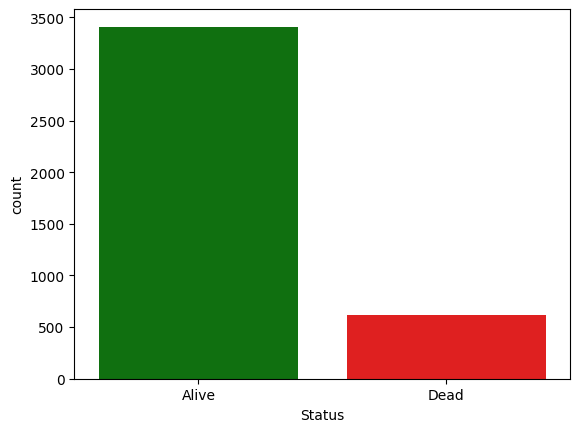

In [142]:
sns.countplot(x='Status',data=data,palette=['g','r'])

In [143]:
data.Status.value_counts()

Status
Alive    3408
Dead      616
Name: count, dtype: int64

### Transform Data

In [144]:
la = LabelEncoder()

In [145]:
obj = data.select_dtypes(include = 'object')
non_obj = data.select_dtypes(exclude = "object")

In [146]:
for i in range(0,obj.shape[1]):
    obj.iloc[:,i] = la.fit_transform(obj.iloc[:,i])
obj = obj.astype('int')

In [147]:
df = pd.concat([obj,non_obj],axis=1)

In [148]:
df.head()

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,2,1,0,0,0,1,3,1,1,1,0,68,4,24,1,60
1,2,1,1,1,2,0,2,1,1,1,0,50,35,14,5,62
2,2,0,2,2,4,0,2,1,1,1,0,58,63,14,7,75
3,2,1,0,0,0,1,3,1,1,1,0,58,18,2,1,84
4,2,1,1,0,1,1,3,1,1,1,0,47,41,3,1,50


### Create Model

In [149]:
x = df.drop(['Status'],axis=1)
y = df['Status'] 
rs = RandomOverSampler(random_state=22)
rs.fit_resample(x,y)

In [150]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=22)

In [151]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = GradientBoostingClassifier()
model4 = SVC()
model5 = XGBClassifier()
model6 = KNeighborsClassifier()

In [152]:
def pred(model):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print(classification_report(y_test, pred))

In [153]:
pred(model1)



              precision    recall  f1-score   support

           0       0.91      0.97      0.94       678
           1       0.75      0.48      0.59       127

    accuracy                           0.89       805
   macro avg       0.83      0.73      0.76       805
weighted avg       0.88      0.89      0.88       805



In [154]:
pred(model2)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       678
           1       0.82      0.52      0.64       127

    accuracy                           0.91       805
   macro avg       0.87      0.75      0.79       805
weighted avg       0.90      0.91      0.90       805



In [155]:
pred(model3)


              precision    recall  f1-score   support

           0       0.92      0.98      0.95       678
           1       0.82      0.54      0.65       127

    accuracy                           0.91       805
   macro avg       0.87      0.76      0.80       805
weighted avg       0.90      0.91      0.90       805



In [156]:
pred(model4)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       678
           1       0.87      0.43      0.57       127

    accuracy                           0.90       805
   macro avg       0.89      0.71      0.76       805
weighted avg       0.90      0.90      0.88       805



In [157]:
pred(model5)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       678
           1       0.76      0.54      0.63       127

    accuracy                           0.90       805
   macro avg       0.84      0.76      0.79       805
weighted avg       0.89      0.90      0.89       805



In [158]:
pred(model6)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       678
           1       0.71      0.43      0.54       127

    accuracy                           0.88       805
   macro avg       0.80      0.70      0.73       805
weighted avg       0.87      0.88      0.87       805

